# Dependencies

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load SVC model

In [2]:
import pickle
with open('svc_model.sav','rb') as f: 
    svc_model=pickle.load(f)

# dataURL

In [3]:
dataURL = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAZAAAAGQCAYAAACAvzbMAAAX0UlEQVR4Xu3dva4cxdYG4LFBtkMkAiQEAhETEBGRcReE5EQE3AMBESkh10FEQITEDSAQfwESqQGx/Wl8vm1vb+/t6X6nVk1Vz3NSenVXPbWq3ukZ2+fOo0ePHu38jwABAgQIrBS4I0BWirmcAAECBB4LCBCNQIAAAQKRgACJ2BQRIECAgADRAwQIECAQCQiQiE0RAQIECAgQPUCAAAECkYAAidgUESBAgIAA0QMECBAgEAkIkIhNEQECBAgIED1AgAABApGAAInYFBEgQICAANEDBAgQIBAJCJCITREBAgQICBA9QIAAAQKRgACJ2BQRIECAgADRAwQIECAQCQiQiE0RAQIECAgQPUCAAAECkYAAidgUESBAgIAA0QMECBAgEAkIkIhNEQECBAgIED1AgAABApGAAInYFBEgQICAANEDBAgQIBAJCJCITREBAgQICBA9QIAAAQKRgACJ2BQRIECAgADRAwQIECAQCQiQiE0RAQIECAgQPUCAAAECkYAAidgUESBAgIAA0QMECBAgEAkIkIhNEQECBAgIED1AgAABApGAAInYFBEgQICAANEDBAgQIBAJCJCITREBAgQICBA9QIAAAQKRgACJ2BQRIECAgADRAwQIECAQCQiQiE0RAQIECAgQPUCAAAECkYAAidgUESBAgIAA0QMECBAgEAkIkIhNEQECBAgIED1AgAABApGAAInYFBEgQICAANEDBAgQIBAJCJCITREBAgQICBA9QIAAAQKRgACJ2BQRIECAgADRAwQIECAQCQiQiE0RAQIECAgQPUCAAAECkYAAidgUESBAgIAA0QMECBAgEAkIkIhNEQECBAgIED1AgAABApGAAInYFBEgQICAANEDBAgQIBAJCJCITREBAgQICBA9QIAAAQKRgACJ2BQRIECAgADRAwQIECAQCQiQiE0RAQIECAgQPUCAAAECkYAAidgUESBAgIAA0QMECBAgEAkIkIhNEQECBAgIED1AgAABApGAAInYFBEgQICAANEDBAgQIBAJCJCITREBAgQICBA9QIAAAQKRgACJ2BQRIECAgADRAwQIECAQCQiQiE0RAQIECAgQPUCAAAECkYAAidgUESBAgIAA0QMECBAgEAkIkIhNEQECBAgIED1AgAABApGAAInYFBEgQICAANEDBAgQIBAJCJCITREBAgQICBA9QIAAAQKRgACJ2BQRIECAgADRAwQIECAQCQiQiE0RAQIECAgQPUCAAAECkYAAidgUESBAgIAA0QMECBAgEAkIkIhNEQECBAgIED1AgAABApGAAInYFBEgQICAANEDBAgQIBAJCJCITREBAgQICBA9QIAAAQKRgACJ2BQRIECAgADRAwQIECAQCQiQiE0RAQIECAgQPUCAAAECkYAAidgUESBAgIAA0QMECBAgEAkIkIhNEQECBAgIED1AgAABApGAAInYFBEgQICAANEDBAgQIBAJCJCITREBAgQICBA9QIAAAQKRgACJ2BQRIECAgADRAwQIECAQCQiQiE0RAQIECAgQPUCAAAECkYAAidgUESBAgIAA0QMECBAgEAkIkIhNEQECBAgIED1AgAABApGAAInYFBEgQICAANEDBAgQIBAJCJCITREBAgQICBA9QIAAAQKRgACJ2BQRIECAgADRAwQIECAQCQiQiE0RAQIECAgQPUCAAAECkYAAidgUESBAgIAA0QMECBAgEAkIkIhNEQECBAgIED1AgAABApGAAInYFBEgQICAANEDBAiUC9y9e3f36NGj8udcfUDv53Wd3CAPEyCDLIRhENiawClC4zZDYVLTXQKkxtVdCZydwEiBIUj6tJ8A6ePsKQQ2J/Dbb7/t3njjje5fTR0L6W3kWMGn9QKknaU7ETgLgQ8//HD3zTffTBccfh9p354CpL2pOxLYpMAHH3yw+/bbbzczN28ixy+lADne0B0IbFpga8HhTaRduwqQdpbuRGBzAnfu3NncnK5PyJtIvsQCJLdTSWCzAp9//vnus88+2+z8hEibpRUgbRzdhcBmBM7hreOmxfImsr6FBch6MxUENitwruFxuaBCZF1rC5B1Xq4msFmBcw+P/cIKkHXtLUDWebmawCYFhMfTZRUiy1tcgCy3ciWBzQm88847ux9//HFz8zpmQgJkuZ4AWW7lSgKbEvDWcfNyCpDlbS5Allu5ksAmBD799NPdF198sYm5VE1CiCyTFSDLnFxFYBMC3jqWLaMAWeYkQJY5uYrA1AKffPLJ7ssvv5x6Dj0HL0CWaQuQZU6uIjCtgLeO9UsnQJaZCZBlTq4iMKWA8MiWTYAscxMgy5xcRWBIgV9//fXx/6nTjP/bh9vFxUU09OpgPGZs0YQmLRIgky6cYRPYC8wWIK0O5uoA2dt6Czm8xwTIYSNXEBhWYPQAaRUY1xdAgIzRks0DpGphfRoYo2GMYiyBEQNkfwb88MMPu3fffbcMq+qcuTpgZ87h5WsaID0W1avl4UV1xfkIjBYgf/755+7VV1/tvgAVZ48AObyMzQKkYgFfNHyLe3hxXbF9gVECpOqrqqUrePfu3ea/WZx6TkvnfsrrVgVI75A4BGOBDwn571sXGCFA3nvvvd33339/cuqK88kH1Rcv69QBcjk1QXLyvWsAJxI4dYCMdMAKkP5NuDhAKhan9XQFSWtR9xtd4JQBMlJ47Nep4owabY6j9eMLA6RiQXoAWPQeyp4xgsCpAmTEPVZxXo04zxH67sm3P49eIFSxIL0mb+F7SXvOKQV++eWX3ZtvvtltCCO/5Vf8kO4cOeI3kJkDZD9ti9/tXPGgEwn8/PPPu7feeqvL07/++uvdRx991OVZ6UNan1nOkDMOECGSbkN1swj89NNPu7fffrt0uCO/dVyfuAApbYXnbr7J30Cuz9KniL5N5WnjCaS/lXz11Ve7jz/+eLwJ3TIiAdJ3qc4iQLyJ9G0qTxtPIAmQGT94CZC+vXc2ASJE+jaWp40lsCZAXnvttd0ff/wx1gQWjkaALIRqdNlZBchM3+U2Wl+3IfBYYGmAzPjWcXWJBUjfhj+rAPEW0re5PG0cgSUBMnt47LUFSN+eO7sAESJ9G8zTxhA4FCBbCA8B0r/XzjJAhEj/RvPE0wq8KEC2Eh4CpH+PnW2ACJH+zeaJBCoFWn995Yw4vFqL/jHFioU5PLQ+V2zp01cfMU8hMJ5A1RnlfHjxWp99gPiTWeMdBkZEYI1Axb+Bdfl8AXJkgPz777+7e/furVnPxddeLk7Vp4elA9EkS6VcR2Asgeqzw9lwZIC89NJLu4uLi5KuuWlxqhvipol4CylZXjclcKvAKfZ5shwC5MgAOfXrYa9G0yjJ9lJDYL1Arz29fmTPVzgXjgiQ33//fff666+3WIcb77F0cXo0nLeQsmV24zMW6LF3K3mXnlGVYxj53i/8Eb3q7SNZlB6NmIxr5MU1NgKnEnj55Zd3//3336ke3/S5zoXbOW8NkMq3j3RBhEjTfeFmBJoIPHjwYPf33383udeIN0nPqxHn0npMtwZI1dvH/r7pJ5OqMV1F1SytW8z9tizQY0+e2s+ZELyBVH3a/+6773bvv/9+3BNV47ockGaJl0bhmQicQ2j4ULmsmW99A6k6qFsc0FVj25O1GN8yelcRmEvg3ILDh8rD/XljgFT+ANbqgK4KkVbjO0zvCgJzCJxrcHgLOdyfNwZIVcO88soru7/++uvwqBZeUREiAmQhvss2L1B1DswK52x4fuVuDJCKg7ni66GKcWqSWbe3cbcSEBy3SzofnrXpFiCt3z720xAgrY4M9zkXgYo9cy52FR+CZ7frFiAVyV2xGSrGOXuTGP92BCr2zHZ0ls3EGfHUqUuAVP4zIa03hOZYtolcNadA6/0yp8Jxo3ZGdA6Q+/fv7x4+fHjcqt1S3XpDVIZdCYCbElgh0Hq/rHj0pi4VIv9bzi5vIJXYFRuicryb2kUmM51AxX6ZDqHBgJ0RtwRIxd8BqcSu2BCV423Qu25BIBao2C/xYCYudEbcEiAVf4SvErtiQ1SOd+I9Y+gbEKjYLxtgWT0FZ8QtAVLRYJXYs413dacqINBQoGK/NBzeNLeqPNOmQbjpN5CKBqvErnhj8kP6TC1srGsEKvb3mudv5drKM20mo2d+RK/6d/2rsSs2RfWYZ2oSY92OQMVe2Y7Oupk4I679KaxZP81XbArNsW4zuXoOgYq9MsfM24/SGXEtQCqaq/LvgFy2RMW4NUf7DeeOcwhU7KdeM9/v217jd0Z0CJAeyBUN02PcvTaV5xBYI1Cxn9Y8f821N+3TXuN3RmwkQCq+euvx5rRmo7iWQC+BXgfwmvkc+wdbKuYkQIoD5NhFX9tga64/dG3PsR8ai/9OoKdAxWGbjr/VPqyYkwApDpCen+I1SLpF1RF4VqBiL601bn04V8yp9RjXGo1w/TN/jLc1ck/g1mPfL07P8Y/QDMZAYC9QsZduk231hnFo5Srm5Hy48gZS8XdAegJrkENbyH8nsEygYi+d8gPZ1uazbBX7XPXkDaTih+ieAVIx/l6fjvostacQWCZwzIHbc88vm03dG9WIc11q0uq6JwFyTNPcNpiewBVvUKf81NRqgd2HwFqBNWdBzz2+dh6X16+Zz5pnzDD3NfNJrt1MgFR9d9vzDwIkC6iGQGuBNQfuDIfomvmssZxh7mvmk1wrQA6o+RoraSs1BMYRECB1a1EWIKc4eDVKXaO4M4FZBZwLdStXFiCn+Oqn4of0Pf0p5lK35O5M4HwEqsJjL+grrCt/jLc19KlwW8/j8reVi4uL89l1ZkpgAwIVZ8FVllOdcSMtTdkbyKlwq95CTjWfkZrFWAjMIFAdHJcGzoQNvoH447wzbHFjJHCcQK+QeNEoBcgGA+TyK6fj2vP5as3SWtT9COQCAiS3a1m5ua+w9jgVX2MJkJZt514EjhMQIMf5tareZIBUfI11ij+W3GqR3YfA1gQEyBgruskA8TXWGM1lFARaC4wQHH5Ef7qqAmRFh/saawWWSwk0Eqj4SvrYoTkL/icoQFZ0kqZZgeVSAoHASG8Ytw3fOeANJGhtf/M0QlM0rMDSw7rHgTniW8ZNC9fDYtiGuWFgm30DqWhIzTNTaxvrIYGlAXLoPulvAhV7dOlYk+vs/+fVNhsgj7+fu3Mn6ZNbazRQU043O7FA6/1xfTrX98tsgXFoPideviEeL0BWLIMAWYHl0uEFqgNkeICVA7T/vYGsbJlnL9dAR/EpHkxAgKxbEPtfgKzrmGtXa6Cj+BQPJiBA1i2I/S9A1nWMADnKS/HYAgJk3foIkI4BMsI//dF6g2igdRvO1WMLtN4fY8/2+NHZ/x0DZP+oU4O33iCnns/xW8AdCDwVaL0/tmBrj69bxbI/hXXqAKn4I4Oaa11zufo0AoIhc7e/17ttNkAqNpEGW99gKvoLVPR+/1n0e6J9nVuXBsgpfwep2EQaLW80lf0EKnq/3+j7PsmePs77SYBUfOVzqq+xtjSX45ZX9TkKCJDDqy44DhstueJJgOwvrmi8UyxUxTxOFYZLFtE1BK4KVPX/VpRPcSZtxe76PATIwpU95ddxC4foMgKPBQTI7Y0gPNpuks0FiK+v2jaIu80nIECeXzPBUdPHzwRIxeHb+5N71ebRgDUN6K7tBar2QPuR1t/Rvq01fiZAql5/ey1iRQBemlxcXNSuhLsTaCRw7gHS67xptFxT32ZTAVK1cTTk1D1+doOv2gcjQfb+ZmOkuY80ls0ESNXbx36xBMhILWsshwS2HiD246EO6PffNxMgVZvGJ51+zehJ/QWq9k2Lmdh7LRRr7/FcgFR8kq9uhMpN4NNObQO6+xwClXvsqkD1WTGH9jyjfC5AZvshvbKxNfM8jWykfQVa7Tt7rO+6tX7a1AHSqolvQ/X20brd3I8AgS0JdAuQ1j9GV4eHT0ZbanNzIUCgQmDKAKkOj9ZhV7Fw7kmAAIFTC9wYIBU/pLc8lKsDxNvHqdvS8wkQmEHgxgAZ9Yf0qmC7vlB++5ihdY2RAIFTC3QNkDVvIQ8ePNj9888/3f8Sn7ePU7ek5xMgMItA9wAZHcbbx+grZHwECIwiIECurIS3j1Ha0jgIEJhBQIBcWSVvHzO0rDESIDCKgAD5/5Xw9jFKSxoHAQKzCNwaIPsJVP9x2ZGQvH2MtBrGQoDADAICxD/XPkOfGiMBAgMKnH2A3L9/f/fw4cMBl8aQCBAgMLbAWQeI3z3Gbk6jI0BgbIEXBsjWfwfxu8fYzWl0BAiMLXC2AeKrq7Eb0+gIEBhf4CwDxFdX4zemERIgML7AwQDZ4tdYvroavzGNkACB8QUWBciWQsRXV+M3pRESIDCHwOIAmT1EfG01R0MaJQEC8wisCpAZQ0RwzNOMRkqAwFwCqwNklhARHHM1otESIDCfQBQgo4eIH8nna0QjJkBgPoE4QEYNEeExXxMaMQECcwocFSCjhYjwmLMJjZoAgTkFjg6Qy2n3+Kff98+4d++ef/xwzl4zagIENibQLEA25mI6BAgQIHBAQIBoEQIECBCIBARIxKaIAAECBASIHiBAgACBSECARGyKCBAgQECA6AECBAgQiAQESMSmiAABAgQEiB4gQIAAgUhAgERsiggQIEBAgOgBAgQIEIgEBEjEpogAAQIEBIgeIECAAIFIQIBEbIoIECBAQIDoAQIECBCIBARIxKaIAAECBASIHiBAgACBSECARGyKCBAgQECA6AECBAgQiAQESMSmiAABAgQEiB4gQIAAgUhAgERsiggQIEBAgOgBAgQIEIgEBEjEpogAAQIEBIgeIECAAIFIQIBEbIoIECBAQIDoAQIECBCIBARIxKaIAAECBASIHiBAgACBSECARGyKCBAgQECA6AECBAgQiAQESMSmiAABAgQEiB4gQIAAgUhAgERsiggQIEBAgOgBAgQIEIgEBEjEpogAAQIEBIgeIECAAIFIQIBEbIoIECBAQIDoAQIECBCIBARIxKaIAAECBASIHiBAgACBSECARGyKCBAgQECA6AECBAgQiAQESMSmiAABAgQEiB4gQIAAgUhAgERsiggQIEBAgOgBAgQIEIgEBEjEpogAAQIEBIgeIECAAIFIQIBEbIoIECBAQIDoAQIECBCIBARIxKaIAAECBASIHiBAgACBSECARGyKCBAgQECA6AECBAgQiAQESMSmiAABAgQEiB4gQIAAgUhAgERsiggQIEBAgOgBAgQIEIgEBEjEpogAAQIEBIgeIECAAIFIQIBEbIoIECBAQIDoAQIECBCIBARIxKaIAAECBASIHiBAgACBSECARGyKCBAgQECA6AECBAgQiAQESMSmiAABAgQEiB4gQIAAgUhAgERsiggQIEBAgOgBAgQIEIgEBEjEpogAAQIEBIgeIECAAIFIQIBEbIoIECBAQIDoAQIECBCIBARIxKaIAAECBASIHiBAgACBSECARGyKCBAgQECA6AECBAgQiAQESMSmiAABAgQEiB4gQIAAgUhAgERsiggQIEBAgOgBAgQIEIgEBEjEpogAAQIEBIgeIECAAIFIQIBEbIoIECBAQIDoAQIECBCIBARIxKaIAAECBASIHiBAgACBSECARGyKCBAgQECA6AECBAgQiAQESMSmiAABAgQEiB4gQIAAgUhAgERsiggQIEBAgOgBAgQIEIgEBEjEpogAAQIEBIgeIECAAIFIQIBEbIoIECBAQIDoAQIECBCIBARIxKaIAAECBASIHiBAgACBSECARGyKCBAgQECA6AECBAgQiAQESMSmiAABAgQEiB4gQIAAgUhAgERsiggQIEBAgOgBAgQIEIgEBEjEpogAAQIEBIgeIECAAIFIQIBEbIoIECBAQIDoAQIECBCIBARIxKaIAAECBASIHiBAgACBSECARGyKCBAgQECA6AECBAgQiAQESMSmiAABAgQEiB4gQIAAgUhAgERsiggQIEBAgOgBAgQIEIgEBEjEpogAAQIEBIgeIECAAIFIQIBEbIoIECBAQIDoAQIECBCIBARIxKaIAAECBASIHiBAgACBSECARGyKCBAgQECA6AECBAgQiAQESMSmiAABAgQEiB4gQIAAgUhAgERsiggQIEBAgOgBAgQIEIgEBEjEpogAAQIE/g9QeiH2ozxrEgAAAABJRU5ErkJggg=="

''
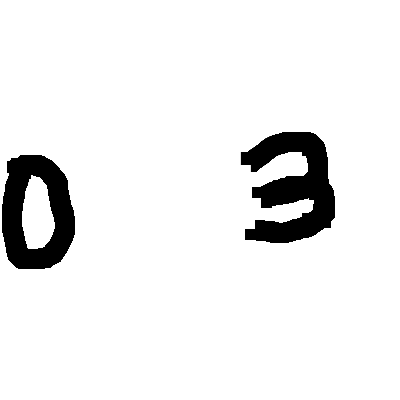

In [4]:
dataURL

# Decode dataURL

In [5]:
from base64 import b64decode

# Python 2 and <Python 3.4
header, encoded = dataURL.split(",", 1)
data = b64decode(encoded)

data

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01\x90\x08\x06\x00\x00\x00\x80\xbf6\xcc\x00\x00\x17\xd1IDATx^\xed\xdd\xbd\xae\x1c\xc5\xd6\x06\xe0\xb1A\xb6C$\x02$\x04\x02\x11\x13\x10\x11\x91q\x17\x84\xe4D\x04\xdc\x03\x01\x11)!\xd7AD@\x84\xc4\r \x10\x7f\x01\x12\xa9\x01\xb1\xfdi|\xbemoo\xef\xed\xe9~\xa7VMU\xcfsRzuW=\xb5\xaa\xde\xe9\x19\xdb\xe7\xce\xa3G\x8f\x1e\xed\xfc\x8f\x00\x01\x02\x04\x08\xac\x14\xb8#@V\x8a\xb9\x9c\x00\x01\x02\x04\x1e\x0b\x08\x10\x8d@\x80\x00\x01\x02\x91\x80\x00\x89\xd8\x14\x11 @\x80\x80\x00\xd1\x03\x04\x08\x10 \x10\t\x08\x90\x88M\x11\x01\x02\x04\x08\x08\x10=@\x80\x00\x01\x02\x91\x80\x00\x89\xd8\x14\x11 @\x80\x80\x00\xd1\x03\x04\x08\x10 \x10\t\x08\x90\x88M\x11\x01\x02\x04\x08\x08\x10=@\x80\x00\x01\x02\x91\x80\x00\x89\xd8\x14\x11 @\x80\x80\x00\xd1\x03\x04\x08\x10 \x10\t\x08\x90\x88M\x11\x01\x02\x04\x08\x08\x10=@\x80\x00\x01\x02\x91\x80\x00\x89\xd8\x14\x11 @\x80\x80\x00\xd1\x03\x04\x08\x10 \x10\t\x08\x90\x88M\x11\x01\x02\x04\x08\x08\x10=@\x80\x00\x01\x02\x

# Save to file image.png
- To check if it is right image

In [6]:
with open("image.png", "wb") as f:
    f.write(data)

# Process image data

In [10]:
# Transfer decoded dataURL into RGB number
image = tf.io.decode_image(data, channels=3)
image.shape

TensorShape([400, 400, 3])

In [12]:
# Resize image, from 400 x 400 to 28 x 28
image_size = (28, 28)
image_28 = tf.image.resize(image, 
                        method="bilinear", 
                        size=image_size,
                       )
image_28.shape

TensorShape([28, 28, 3])

In [14]:
# Convert image from RGB format to grey format. That is from 3 varialbe to 1 varialbe for a point in image
image_28_grey = tf.image.rgb_to_grayscale(image_28)
image_28_grey.shape

TensorShape([28, 28, 1])

In [15]:
# convert tensorflow.python.framework.ops.EagerTensor into numpy array
image_28_grey_np = image_28_grey.numpy()
type(image_28_grey_np)

numpy.ndarray

In [16]:
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image_28_grey_np /= 255

In [25]:
# Flatten into a 1x28*28 array 
img = image_28_grey_np.flatten().reshape(-1, 28*28)
img.shape

(1, 784)

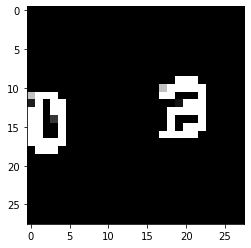

In [26]:
# Show image
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

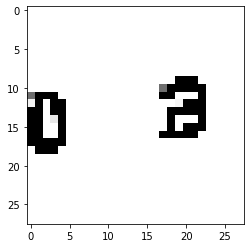

In [27]:
# Invert the pixel values to match the original data
img_inverted = 1 - img
plt.imshow(img_inverted.reshape(28, 28), cmap=plt.cm.Greys)

In [20]:
img.shape

(1, 784)

In [22]:
image_28_grey_np

array([[[0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004]],

       [[0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        [0.99990004],
        

# Create image coordinates data.
- E.g. create the coordintes(x,y) array for the black point in img_inverted

In [31]:
coors =[]
for index, value in np.ndenumerate(image_28_grey_np):
    point = []
    if value == 0:
        point.append(index[0])
        point.append(index[1])
        coors.append(point)
        
coors = np.array(coors)
coors[:10]

array([[ 9, 19],
       [ 9, 20],
       [ 9, 21],
       [10, 18],
       [10, 19],
       [10, 20],
       [10, 21],
       [10, 22],
       [11,  1],
       [11,  2]])

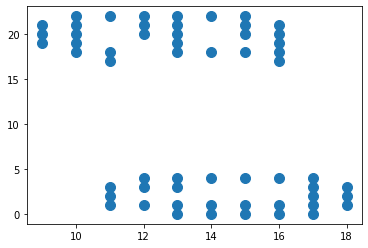

In [32]:
# Plot the coors
plt.scatter(coors[:, 0], coors[:, 1], s=100, cmap="bwr");
plt.show()

# Use SVC model to predict
- that is, to divide the image
- The "0" in predictions represents one image
- The "1" in predictions represents another image

In [35]:
predictions = svc_model.predict(coors)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# Divid image based on predictions

### Create the first image for "0" in predictions
### Create the second image for "1" in predictions

In [43]:
imgA = []
imgB = []
for index, value in np.ndenumerate(predictions):
    if value == 0:
        imgA.append(coors[index[0]])
    else:
        imgB.append(coors[index[0]])

# Transfer list into numpy array
imgA = np.array(imgA)
imgB = np.array(imgB)

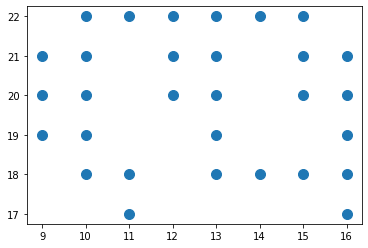

In [44]:
# Show the first image
plt.scatter(imgA[:, 0], imgA[:, 1], s=100, cmap="bwr");
plt.show()

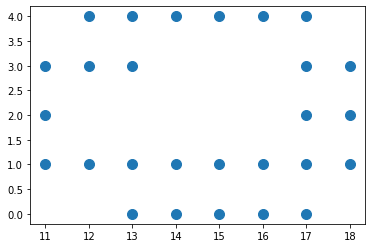

In [45]:
# Show the second image
plt.scatter(imgB[:, 0], imgB[:, 1], s=100, cmap="bwr");
plt.show()

# Resize imgA and imgB to size 28x28

In [46]:
imgA_28 = np.zeros(shape=(28, 28))
imgB_28 = np.zeros(shape=(28, 28))
for v in imgA:
    imgA_28[v[0], v[1]] = 1

for v in imgB:
    imgB_28[v[0], v[1]] = 1

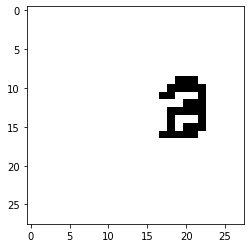

In [49]:
# Show imgA and imgB
plt.imshow(imgA_28, cmap=plt.cm.Greys)
plt.show()

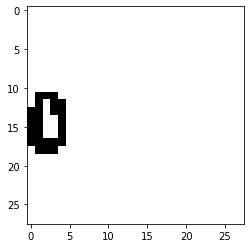

In [48]:
plt.imshow(imgB_28, cmap=plt.cm.Greys)
plt.show()

# Next step: Center the image

In [51]:
type(imgA_28)

numpy.ndarray

# Question: how to transfer the above images to base64 or dataURL format